<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/09_lineplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: lineplot

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd

Grab parking data from [UCI resource](https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham) with Bash commands and read in as `pandas` DataFrame.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip

--2025-02-02 11:35:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [   <=>              ] 234.90K   453KB/s    in 0.5s    

2025-02-02 11:35:15 (453 KB/s) - ‘dataset.zip’ saved [240539]



In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset.csv             


In [ ]:
df = pd.read_csv('dataset.csv', parse_dates=[3])

In [ ]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


Do a bit of data cleaning:
- Rename some columns
- Create three new date/time columns for later aggregations
- Filter down to only two garage locations

In [ ]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [ ]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

In [ ]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


## Intro Visuals

In [ ]:
blue, orange, green, red = sns.color_palette()[:4]

In [ ]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('date.autoformatter', day='%b %Y')

In [ ]:
months = [pd.to_datetime('2016-10-01'), pd.to_datetime('2016-11-01'), pd.to_datetime('2016-12-01')]

plt.figure(figsize=(10,6))
sns.lineplot(x=park.Day, y=park.Occupancy, ci=None)
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.datetime('2016, 12, 1'))
plt.ylim(0, 570)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

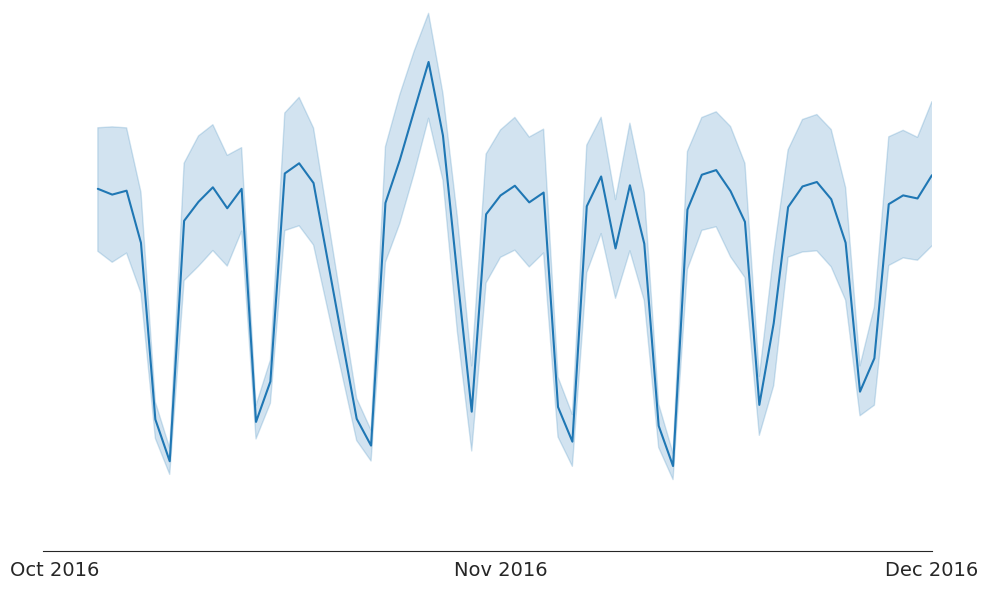

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=park.Day, y=park.Occupancy)
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.to_datetime('2016, 12, 1'))
plt.ylim(0, 570)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

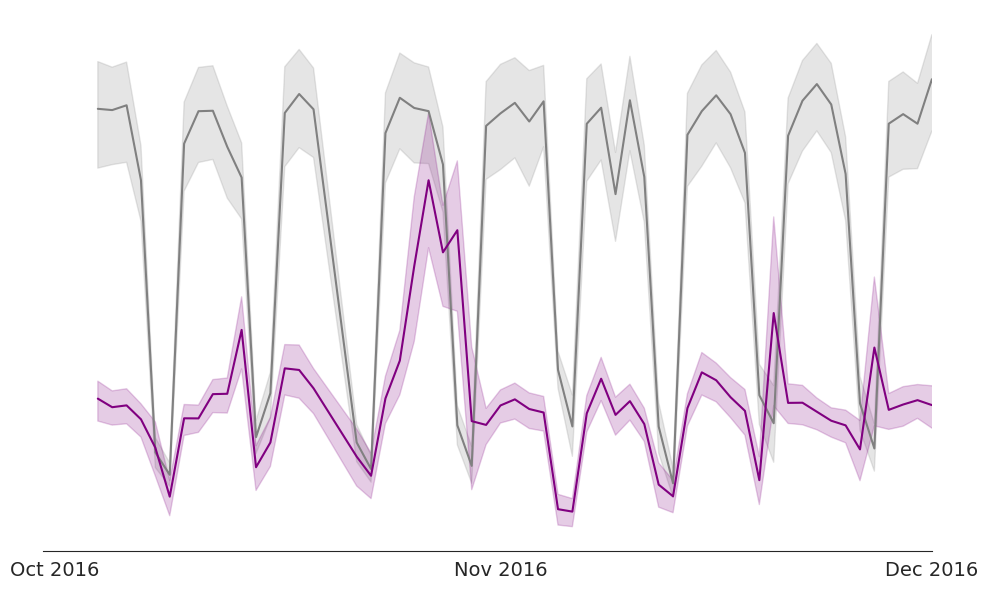

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=park.Day, y=park.Occupancy, hue=park.Location, palette=['gray', 'purple'])
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.to_datetime('2016, 12, 1'))
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.legend([], frameon=False)
plt.tight_layout()

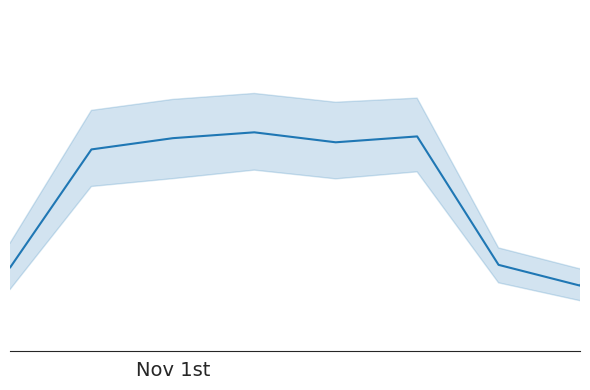

In [ ]:
plt.rc('date.autoformatter', day='%b 1st')
plt.figure(figsize=(6,4))
sns.lineplot(x=park.Day, y=park.Occupancy)
plt.xticks(months)
plt.yticks([])
plt.xlim(pd.to_datetime('2016, 10, 30'), pd.to_datetime('2016, 11, 6'))
sns.despine(left=True)
plt.ylim(0, 600)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

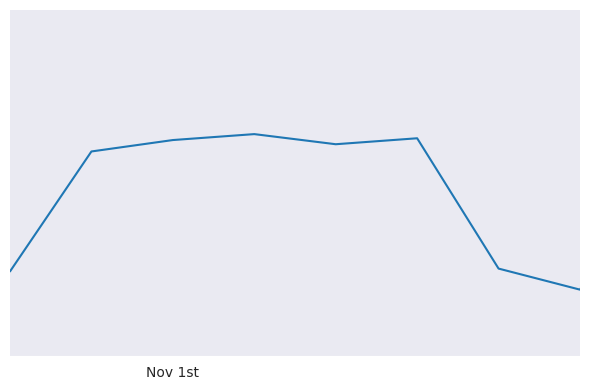

In [ ]:
plt.rc('date.autoformatter', day='%b 1st')
plt.figure(figsize=(6,4))
sns.lineplot(x=park.Day, y=park.Occupancy, errorbar=None)
plt.xticks(months)
plt.yticks([])
plt.xlim(pd.to_datetime("2016, 10, 30"), pd.to_datetime('2016, 11, 6'))
plt.ylim(0, 600)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics

In [ ]:
sns.set_style('dark')

In [ ]:
months = [pd.to_datetime("2016, 10, 1"),
          pd.to_datetime("2016, 11, 1"),
          pd.to_datetime("2016, 12, 1")]
plt.rc('date.autoformatter', day='%b %Y')

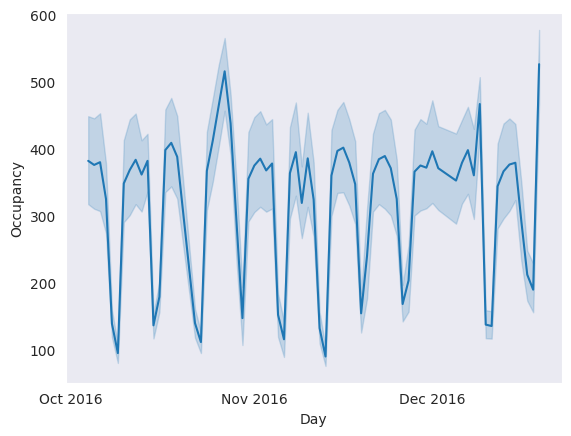

In [ ]:
sns.lineplot(x=park.Day, y=park.Occupancy)
plt.xticks(months)

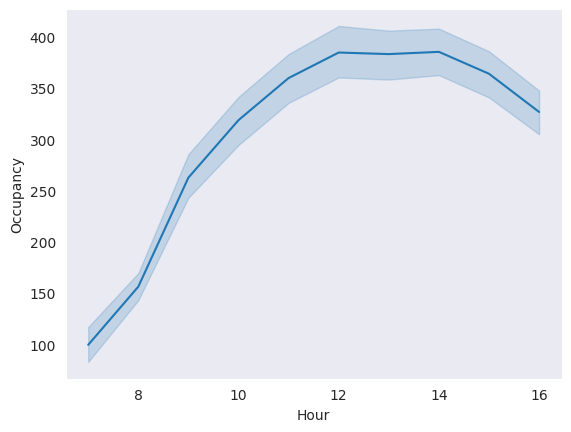

In [ ]:
sns.lineplot(x=park.Hour, y=park.Occupancy)

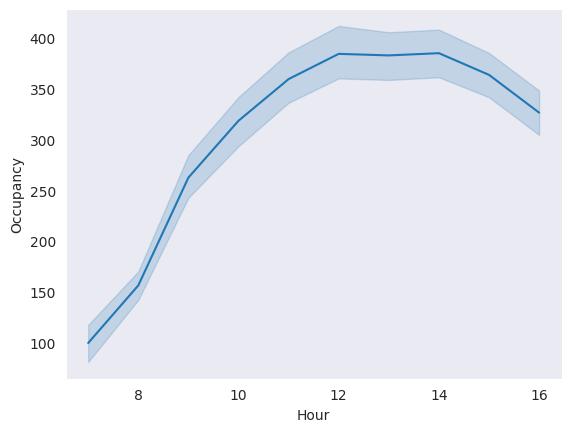

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park)

## Bootstrapping

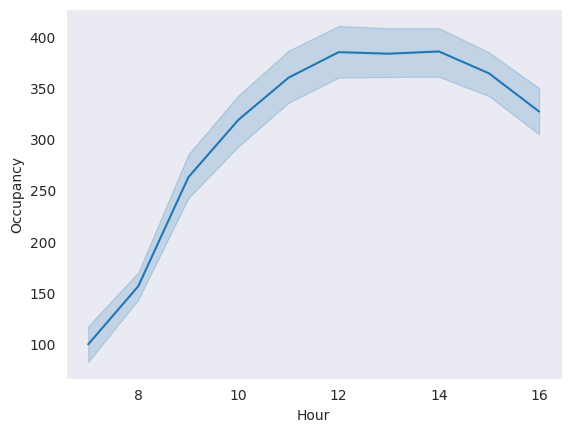

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             n_boot=1000
            )

Decreasing the number of bootstrap samples will increase variance of confidence intervals.

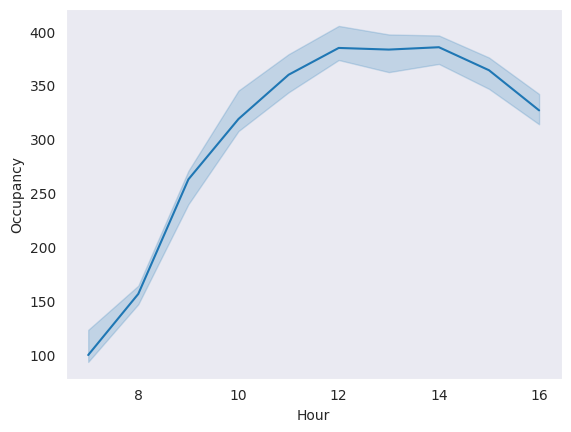

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             n_boot=10
            )

<Axes: xlabel='Hour', ylabel='Occupancy'>

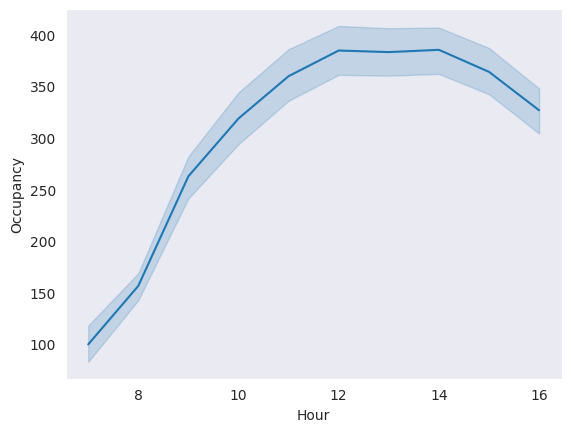

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             errorbar=('ci', 95)
            )

<Axes: xlabel='Hour', ylabel='Occupancy'>

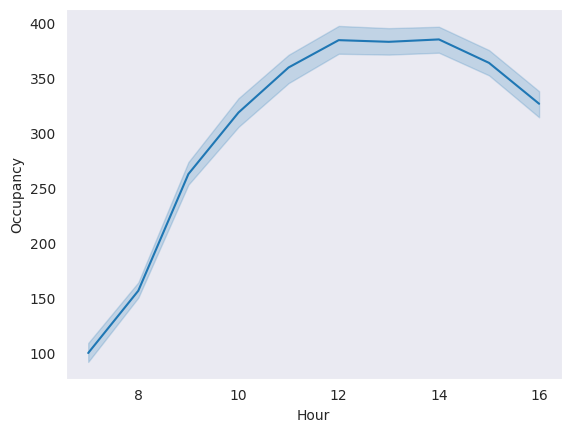

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             errorbar=('ci', 68)
            )

To turn off the bootstrapped confidence intervals, set `ci=None` to trigger early exit within Seaborn code.  (A conditional checks for this case and completely bypasses the bootstrapping procedure if `ci` is set to `None`.  This saves time if confidence intervals are not needed!)

<Axes: xlabel='Hour', ylabel='Occupancy'>

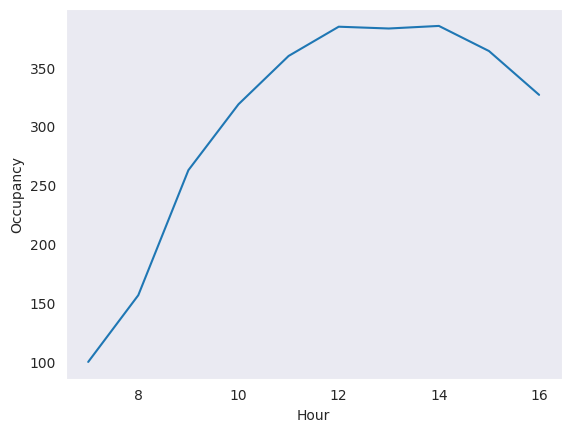

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             errorbar=None
            )

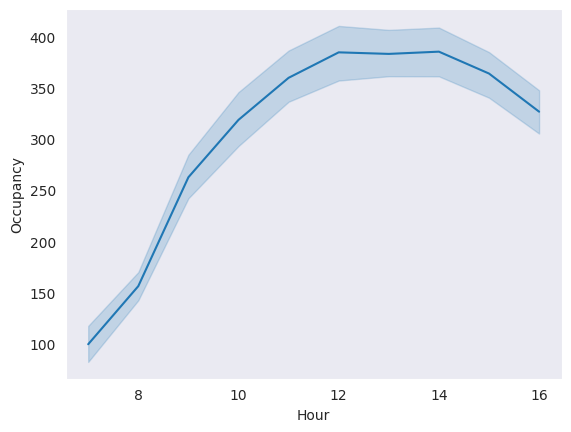

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             estimator='mean'
            )

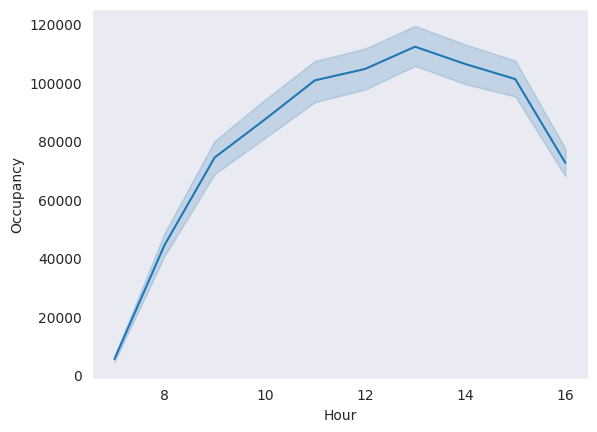

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             estimator='sum'
            )

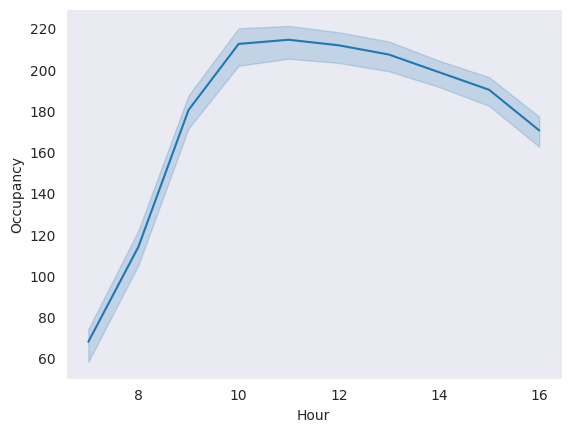

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             estimator='std'
            )

## Visual Semantics

### hue

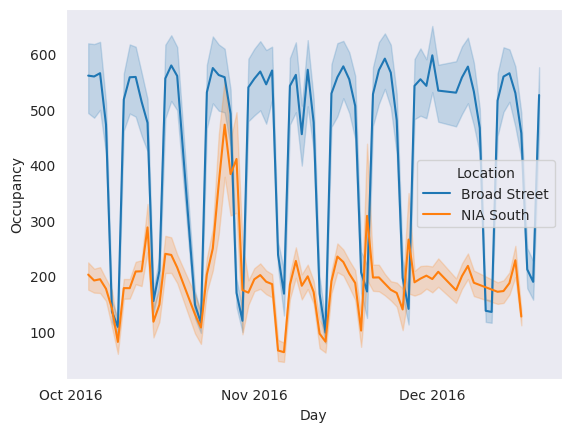

In [ ]:
sns.lineplot(x='Day', y='Occupancy', data=park, hue='Location')

plt.xticks(months)

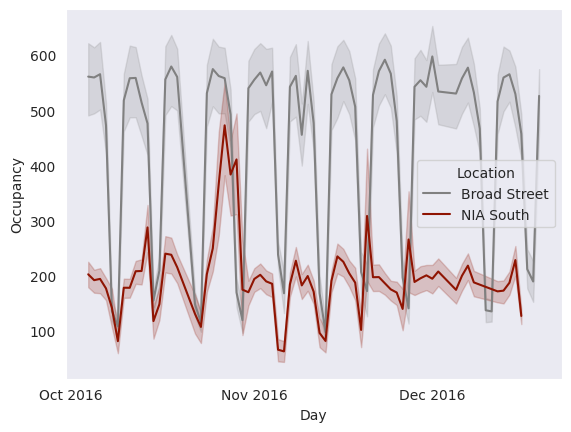

In [ ]:
sns.lineplot(x='Day', y='Occupancy', data=park,
             hue='Location',
             palette = ['gray', 'xkcd:brick red']
            )

plt.xticks(months)

### style

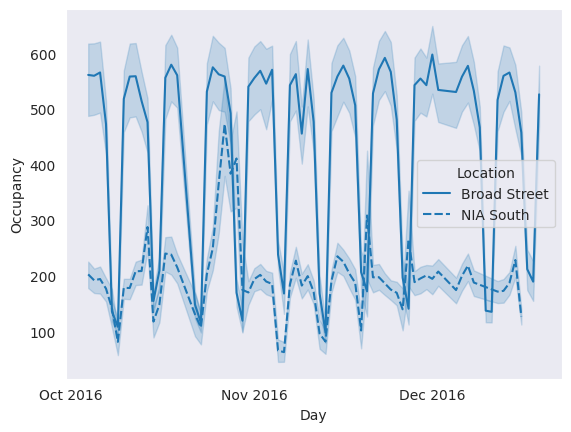

In [ ]:
sns.lineplot(x='Day', y='Occupancy', data=park, style='Location')

plt.xticks(months)

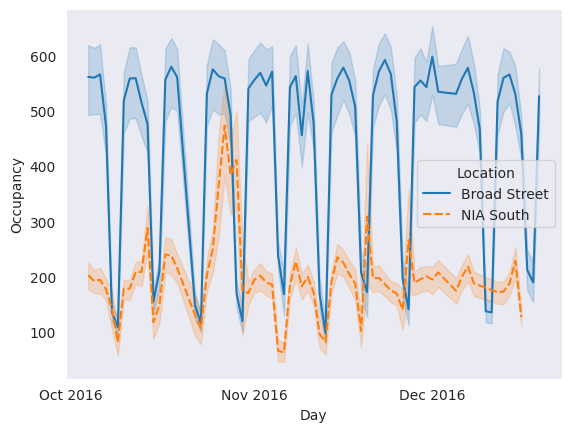

In [ ]:
sns.lineplot(x='Day', y='Occupancy', data=park,
             hue="Location",
             style='Location'
            )

plt.xticks(months)

### size

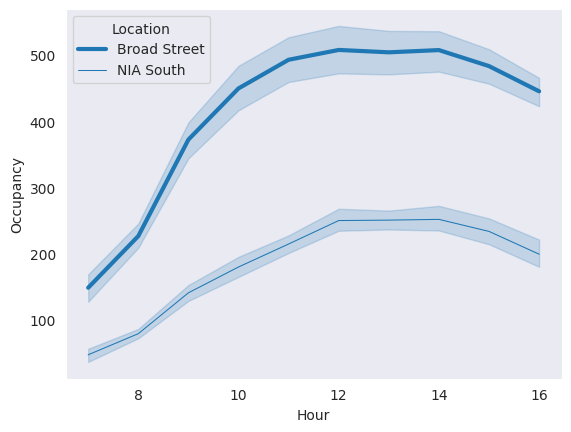

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park, size='Location',
            )

<Axes: xlabel='Hour', ylabel='Occupancy'>

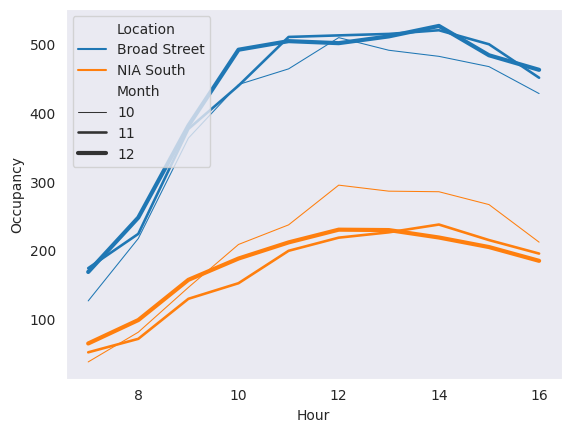

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park, errorbar=None,
             hue='Location',
             size='Month'
            )

## Style

Most of matplotlib's line styling works within the Seaborn lineplot.  (The main exception is that `linestyle` does not work.)

([<matplotlib.axis.XTick at 0x7ce14def6390>,
 [Text(17075.0, 0, 'Oct 1st'),
  Text(17106.0, 0, 'Nov 1st'),
  Text(17136.0, 0, 'Dec 1st')])

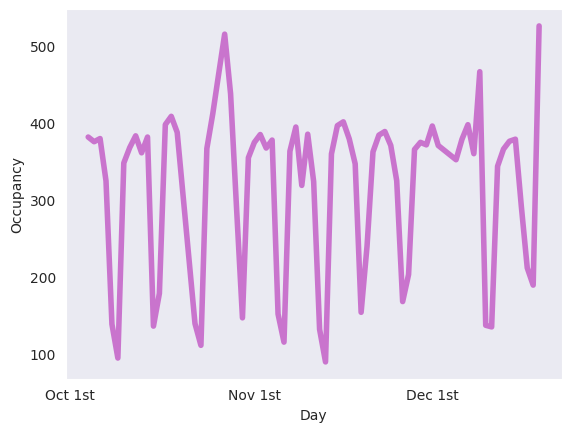

In [ ]:
sns.lineplot(x='Day', y='Occupancy', data=park, errorbar=None,
             lw=4,
             color='#aa00aa',
             alpha=0.5
            )

plt.xticks(months)